In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

## Profile

In [2]:
prof = pd.read_csv("userprofile.csv")

In [4]:
prof.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [6]:
prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

In [8]:
for i in prof.columns:
    print(f"{[i]} \n {prof[i].unique()} \n")

['userID'] 
 ['U1001' 'U1002' 'U1003' 'U1004' 'U1005' 'U1006' 'U1007' 'U1008' 'U1009'
 'U1010' 'U1011' 'U1012' 'U1013' 'U1014' 'U1015' 'U1016' 'U1017' 'U1018'
 'U1019' 'U1020' 'U1021' 'U1022' 'U1023' 'U1024' 'U1025' 'U1026' 'U1027'
 'U1028' 'U1029' 'U1030' 'U1031' 'U1032' 'U1033' 'U1034' 'U1035' 'U1036'
 'U1037' 'U1038' 'U1039' 'U1040' 'U1041' 'U1042' 'U1043' 'U1044' 'U1045'
 'U1046' 'U1047' 'U1048' 'U1049' 'U1050' 'U1051' 'U1052' 'U1053' 'U1054'
 'U1055' 'U1056' 'U1057' 'U1058' 'U1059' 'U1060' 'U1061' 'U1062' 'U1063'
 'U1064' 'U1065' 'U1066' 'U1067' 'U1068' 'U1069' 'U1070' 'U1071' 'U1072'
 'U1073' 'U1074' 'U1075' 'U1076' 'U1077' 'U1078' 'U1079' 'U1080' 'U1081'
 'U1082' 'U1083' 'U1084' 'U1085' 'U1086' 'U1087' 'U1088' 'U1089' 'U1090'
 'U1091' 'U1092' 'U1093' 'U1094' 'U1095' 'U1096' 'U1097' 'U1098' 'U1099'
 'U1100' 'U1101' 'U1102' 'U1103' 'U1104' 'U1105' 'U1106' 'U1107' 'U1108'
 'U1109' 'U1110' 'U1111' 'U1112' 'U1113' 'U1114' 'U1115' 'U1116' 'U1117'
 'U1118' 'U1119' 'U1120' 'U1121' 'U112

Dari data diatas tidak terdapat data null, tetapi ada value berupa "?" yang tidak memberikan informasi apa apa

In [9]:
prof.describe()

,latitude,longitude,birth_year,weight,height
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,21.810389,-100.291857,1984.702899,64.869565,1.667536
std,1.552529,0.869916,14.655364,17.214332,0.130473
min,18.813348,-101.054680,1930.000000,40.000000,1.200000
25%,22.126030,-100.983000,1987.000000,53.000000,1.600000
50%,22.150497,-100.937788,1989.000000,65.000000,1.690000
75%,22.186642,-99.183251,1991.000000,74.750000,1.750000
max,23.771030,-99.067106,1994.000000,120.000000,2.000000


In [10]:
prof.describe(include=['O'])

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget
count,138,138,138,138,138,138,138,138,138,138,138,138,138,138
unique,138,3,3,5,4,4,4,4,5,4,5,5,8,4
top,U1001,false,abstemious,no preference,family,public,single,independent,variety,hard-worker,Catholic,student,blue,medium
freq,1,109,51,53,70,82,122,113,50,61,99,113,45,91


In [13]:
prof_col = prof.columns
def vis(i):
    if prof_col[i] == 'birth_year' or prof_col[i] == 'weight' or prof_col[i] == 'height':
        plt.hist(prof[prof_col[i]])
        plt.title('User ' + prof_col[i] + ' distribution')
    else:
        temp1 = prof[prof_col[i]].value_counts().reset_index()
        temp1.columns = [prof_col[i], 'number']

        plt.pie(
            temp1['number'],
            labels = temp1[prof_col[i]],
            autopct = '%1.1f%%',
#             startangle=90
        )
        plt.title(prof_col[i])

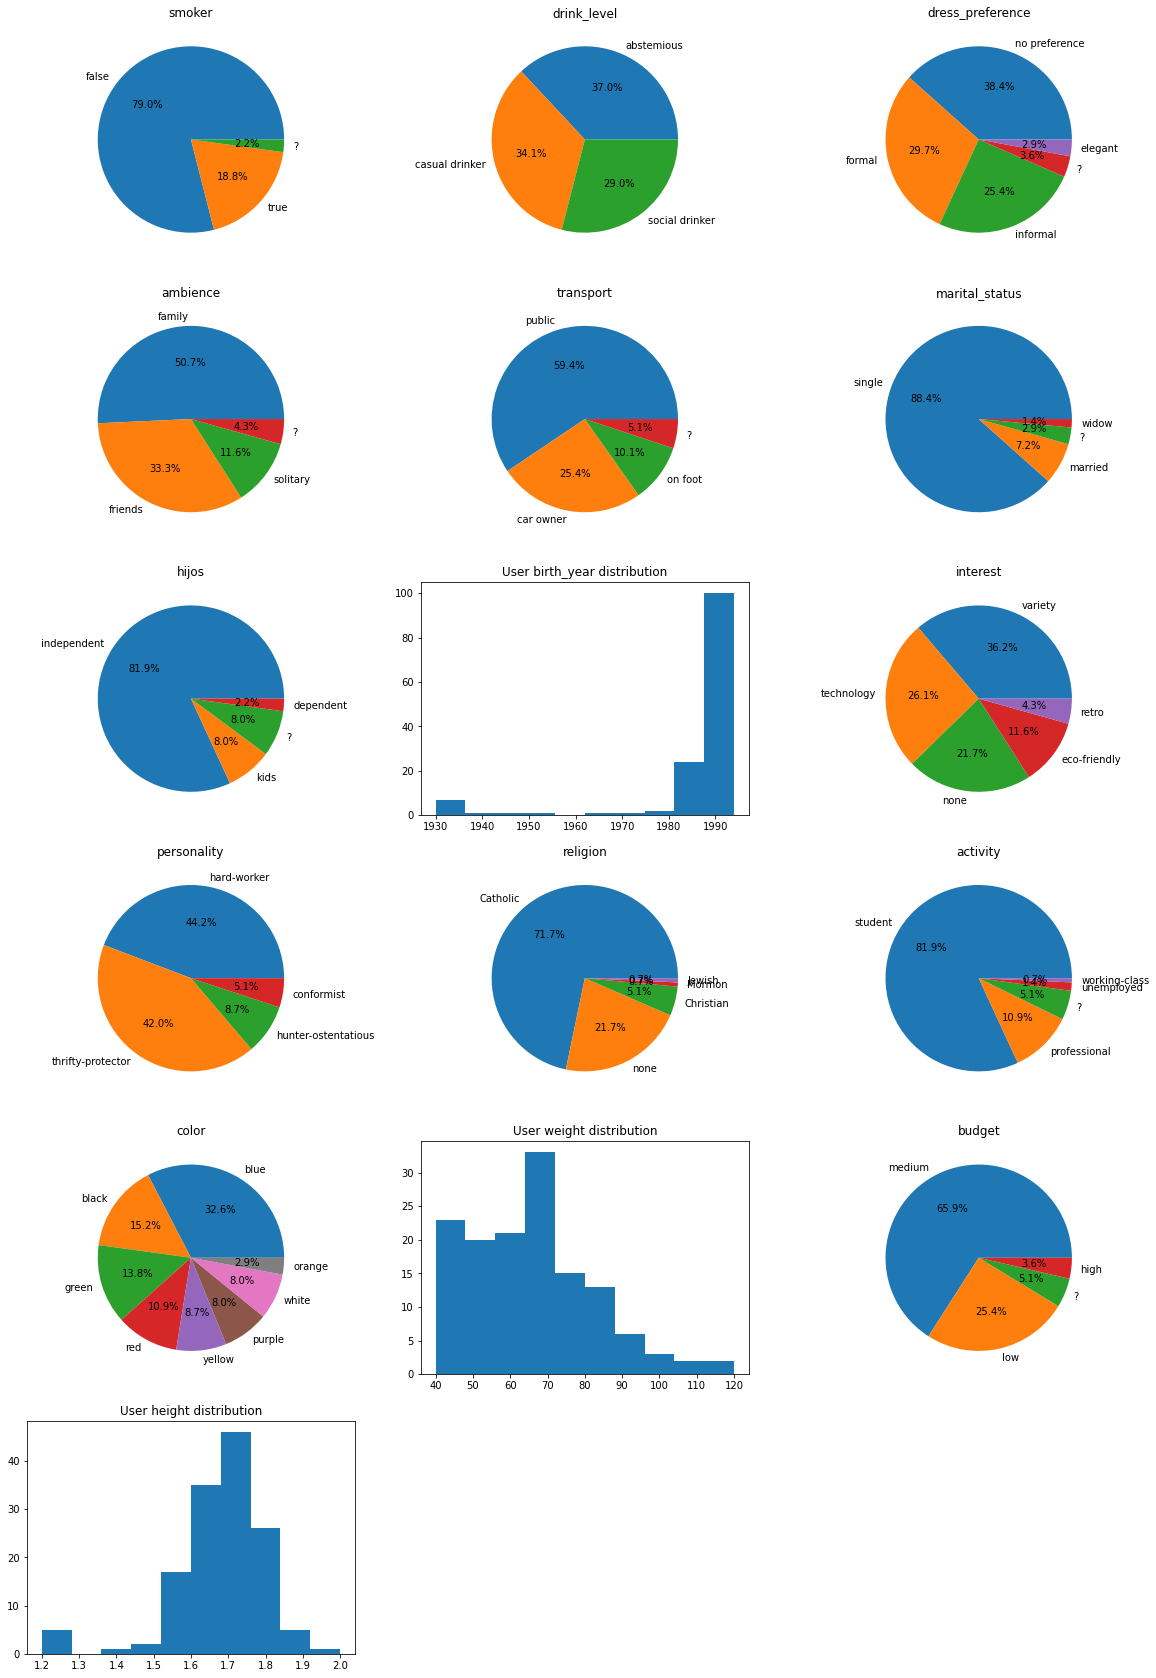

In [14]:
fig1 = plt.figure('User Profile', figsize = (20, 30))
for i in range(3 , len(prof_col)):
    plt.subplot(6,3,i-2)
    vis(i)
    
plt.show()

## Cuisine

In [15]:
cuis = pd.read_csv('usercuisine.csv')

In [17]:
cuis.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [18]:
cuis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userID    330 non-null    object
 1   Rcuisine  330 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


In [19]:
for i in cuis.columns:
    print(f"{[i]} \n {cuis[i].unique()} \n")

['userID'] 
 ['U1001' 'U1002' 'U1003' 'U1004' 'U1005' 'U1006' 'U1007' 'U1008' 'U1009'
 'U1010' 'U1011' 'U1012' 'U1013' 'U1014' 'U1015' 'U1016' 'U1017' 'U1018'
 'U1019' 'U1020' 'U1021' 'U1022' 'U1023' 'U1024' 'U1025' 'U1026' 'U1027'
 'U1028' 'U1029' 'U1030' 'U1031' 'U1032' 'U1033' 'U1034' 'U1035' 'U1036'
 'U1037' 'U1038' 'U1039' 'U1040' 'U1041' 'U1042' 'U1043' 'U1044' 'U1045'
 'U1046' 'U1047' 'U1048' 'U1049' 'U1050' 'U1051' 'U1052' 'U1053' 'U1054'
 'U1055' 'U1056' 'U1057' 'U1058' 'U1059' 'U1060' 'U1061' 'U1062' 'U1063'
 'U1064' 'U1065' 'U1066' 'U1067' 'U1068' 'U1069' 'U1070' 'U1071' 'U1072'
 'U1073' 'U1074' 'U1075' 'U1076' 'U1077' 'U1078' 'U1079' 'U1080' 'U1081'
 'U1082' 'U1083' 'U1084' 'U1085' 'U1086' 'U1087' 'U1088' 'U1089' 'U1090'
 'U1091' 'U1092' 'U1093' 'U1094' 'U1095' 'U1096' 'U1097' 'U1098' 'U1099'
 'U1100' 'U1101' 'U1102' 'U1103' 'U1104' 'U1105' 'U1106' 'U1107' 'U1108'
 'U1109' 'U1110' 'U1111' 'U1112' 'U1113' 'U1114' 'U1115' 'U1116' 'U1117'
 'U1118' 'U1119' 'U1120' 'U1121' 'U112

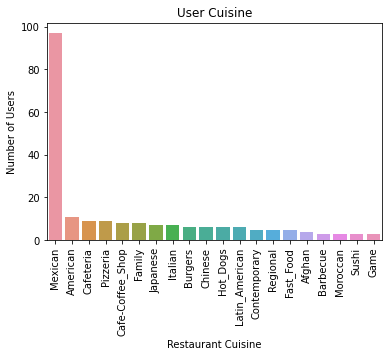

In [25]:
ll = cuis['Rcuisine'].value_counts().reset_index().head(20)
ll.columns = ['Rcuisine', 'Count']

sns.barplot(data = ll, x = 'Rcuisine', y = 'Count')
plt.title('User Cuisine')
plt.xlabel('Restaurant Cuisine')
plt.ylabel('Number of Users')
plt.xticks(rotation = 90);

In [26]:
res_cuisine = pd.read_csv('chefmozcuisine.csv')

In [27]:
res_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [28]:
for i in res_cuisine.columns:
    print(f"{[i]} \n {res_cuisine[i].unique()} \n")

['placeID'] 
 [135110 135109 135107 135106 135105 135104 135103 135102 135101 135100
 135099 135098 135097 135094 135093 135092 135091 135090 135089 135088
 135086 135085 135079 135075 135074 135073 135072 135071 135069 135061
 135060 135059 135058 135057 135056 135055 135054 135053 135052 135049
 135048 135046 135044 135043 135042 135041 135039 135037 135036 135035
 135034 135032 135031 135030 135029 135028 135027 135026 135025 135022
 135021 135020 135019 135018 135008 135007 135005 135004 135003 135002
 134999 134997 134990 134989 134988 134986 134985 134984 134983 134982
 134981 134980 134976 134973 134972 134971 133049 133048 133047 133043
 133039 133038 133037 133036 133035 133034 133033 133032 133031 133030
 133029 133028 133027 133026 133020 133014 133010 133009 133008 133007
 133000 132996 132995 132994 132993 132992 132986 132985 132980 132973
 132972 132971 132970 132969 132968 132967 132966 132965 132964 132963
 132962 132961 132960 132959 132958 132957 132956 132955 132954

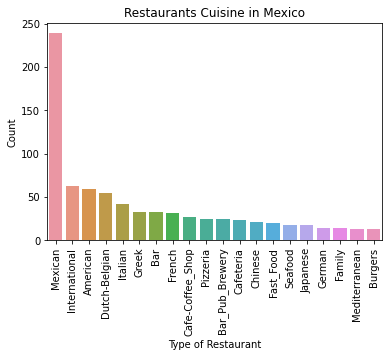

In [29]:
tt = res_cuisine['Rcuisine'].value_counts().reset_index().head(20)
tt.columns = ['Rcuisine', 'Count']

sns.barplot(data = tt, x = 'Rcuisine', y = 'Count')
plt.title('Restaurants Cuisine in Mexico')
plt.xlabel('Type of Restaurant')
plt.xticks(rotation = 90);

## Restaurant Profile

In [30]:
resto_profile = pd.read_csv('geoplaces2.csv')

In [31]:
resto_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   placeID         130 non-null    int64  
 1   latitude        130 non-null    float64
 2   longitude       130 non-null    float64
 3   the_geom_meter  130 non-null    object 
 4   name            130 non-null    object 
 5   address         130 non-null    object 
 6   city            130 non-null    object 
 7   state           130 non-null    object 
 8   country         130 non-null    object 
 9   fax             130 non-null    object 
 10  zip             130 non-null    object 
 11  alcohol         130 non-null    object 
 12  smoking_area    130 non-null    object 
 13  dress_code      130 non-null    object 
 14  accessibility   130 non-null    object 
 15  price           130 non-null    object 
 16  url             130 non-null    object 
 17  Rambience       130 non-null    obj

In [32]:
for i in resto_profile.columns:
    print(f"{[i]} \n {resto_profile[i].unique()} \n")

['placeID'] 
 [134999 132825 135106 132667 132613 135040 132732 132875 132609 135082
 135070 135069 135065 135076 135086 132870 132854 132937 132856 132668
 135033 132862 134983 132851 135013 135042 132768 132561 135045 132847
 135054 134975 135053 135050 135025 135030 135057 135079 134992 132954
 135041 132608 135046 132564 132869 132925 132955 135059 135001 135063
 135080 135000 135066 135034 135060 135055 135108 135074 135018 135064
 135038 135081 132723 135051 135021 135052 132845 135011 132858 135026
 132884 135016 135104 132630 135047 132951 132665 135044 135035 135071
 132834 132846 135048 132717 132861 132885 132740 132830 132773 132706
 132872 134987 132572 132958 132733 132922 132715 135027 132767 135039
 134996 132755 135043 132654 135049 135073 132560 134976 135075 132660
 132921 132594 134986 135062 132766 135088 135058 132754 132584 135032
 135028 135085 132663 132626 132583 132866 135072 135109 135019 132877] 

['latitude'] 
 [18.915421  22.1473922 22.1497088 23.7526973 

In [33]:
resto_profile.drop(['the_geom_meter', 'fax', 'zip', 'url'], axis=1, inplace=True)

In [34]:
resto_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   placeID         130 non-null    int64  
 1   latitude        130 non-null    float64
 2   longitude       130 non-null    float64
 3   name            130 non-null    object 
 4   address         130 non-null    object 
 5   city            130 non-null    object 
 6   state           130 non-null    object 
 7   country         130 non-null    object 
 8   alcohol         130 non-null    object 
 9   smoking_area    130 non-null    object 
 10  dress_code      130 non-null    object 
 11  accessibility   130 non-null    object 
 12  price           130 non-null    object 
 13  Rambience       130 non-null    object 
 14  franchise       130 non-null    object 
 15  area            130 non-null    object 
 16  other_services  130 non-null    object 
dtypes: float64(2), int64(1), object(14)

In [35]:
resto_profile['city'] = resto_profile['city'].replace(
    ('san luis potosi', 'san luis potosi ', 'san luis potos', 's.l.p.', 's.l.p', 'slp', '?'),
    'San Luis Potosi'
)
resto_profile['city'] = resto_profile['city'].replace(
    'cuernavaca',
    'Cuernavaca'
)
resto_profile['city'] = resto_profile['city'].replace(
    ('victoria', 'victoria ', 'Cd Victoria', 'Cd. Victoria'),
    'Ciudad Victoria'
)
resto_profile['state'] = resto_profile['state'].replace(
    ('SLP', 'san luis potosi', 'slp', 'S.L.P.', 'san luis potos', 's.l.p.', '?'),
    'San Luis Potosi'
)
resto_profile['state'] = resto_profile['state'].replace(
    'morelos',
    'Morelos'
)
resto_profile['state'] = resto_profile['state'].replace(
    'tamaulipas',
    'Tamaulipas'
)
resto_profile['state'] = resto_profile['state'].replace(
    'mexico',
    'Mexico'
)
resto_profile['country'] = resto_profile['country'].replace(
    ('mexico', '?'),
    'Mexico'
)

In [36]:
resto_profile.to_csv('resto_profile.csv', index = False)

In [37]:
col_resto_profile = resto_profile.columns
def vis_resto_profile(i):
    temp = resto_profile[col_resto_profile[i]].value_counts().reset_index()
    temp.columns = [col_resto_profile[i], 'number']

    plt.pie(
        temp['number'],
        labels = temp[col_resto_profile[i]],
        autopct = '%1.1f%%'
    )
    plt.title(col_resto_profile[i])

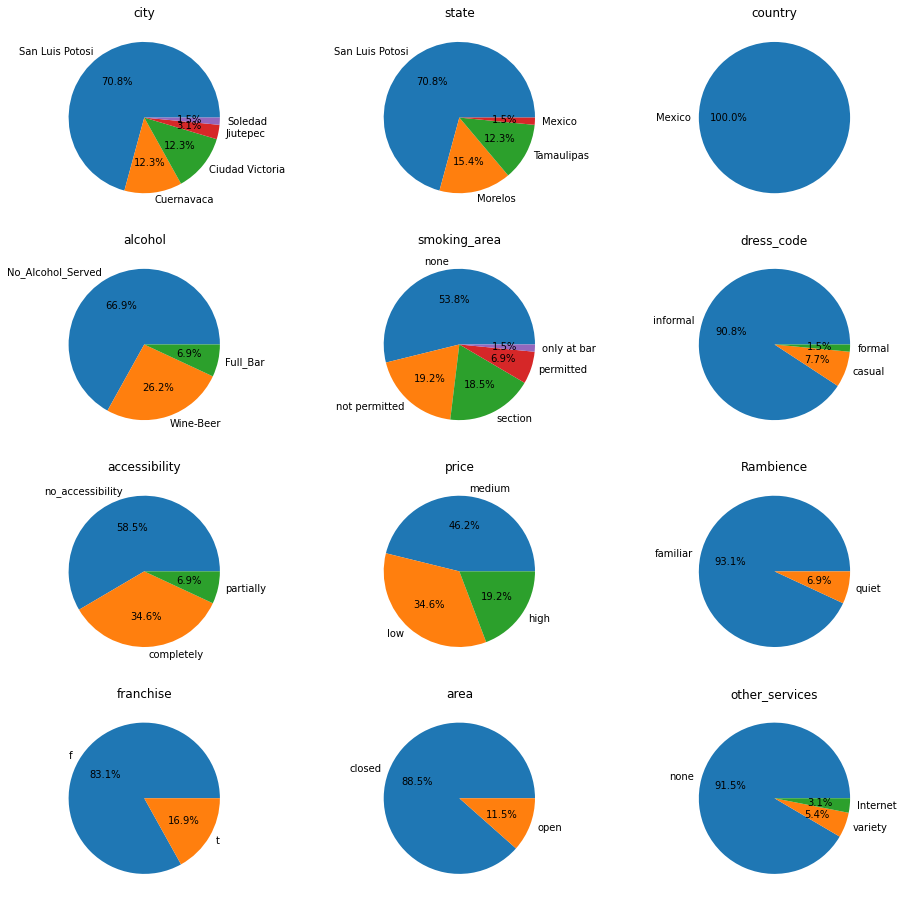

In [38]:
fig = plt.figure('Resto Profile', figsize = (16, 16))
for i in range(5 , len(col_resto_profile)):
    plt.subplot(4,3,i-4)
    vis_resto_profile(i)
    
plt.show()

## Recommender System with Cosine Similiarity

### Make Description

In [39]:
resto_profile['desc'] = resto_profile['city'].str.cat(
    resto_profile[['alcohol', 'smoking_area', 'dress_code', 'price', 'Rambience', 'area']],
    sep = ' '
)

In [40]:
resto_profile.head()

,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,desc
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,Cuernavaca No_Alcohol_Served none informal med...
1,132825,22.147392,-100.983092,puesto de tacos,esquina santos degollado y leon guzman,San Luis Potosi,San Luis Potosi,Mexico,No_Alcohol_Served,none,informal,completely,low,familiar,f,open,none,San Luis Potosi No_Alcohol_Served none informa...
2,135106,22.149709,-100.976093,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,Wine-Beer,only at bar,informal,partially,medium,familiar,f,open,none,San Luis Potosi Wine-Beer only at bar informal...
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,calle emilio portes gil,Ciudad Victoria,Tamaulipas,Mexico,No_Alcohol_Served,none,informal,completely,low,familiar,t,closed,none,Ciudad Victoria No_Alcohol_Served none informa...
4,132613,23.752903,-99.165076,carnitas_mata,lic. Emilio portes gil,Ciudad Victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,closed,none,Ciudad Victoria No_Alcohol_Served permitted in...


In [42]:
CV = CountVectorizer(
    tokenizer = lambda i: i.split(' '),
    analyzer = 'word'
)
matrix = CV.fit_transform(resto_profile['desc'])
type_desc = CV.get_feature_names()
s_desc = len(type_desc)
e_desc = matrix.toarray()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
print(s_desc)

28


In [44]:
print(e_desc)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
score = cosine_similarity(matrix)
score

array([[1.        , 0.50395263, 0.34188173, ..., 0.35856858, 0.71428571,
        0.62994079],
       [0.50395263, 1.        , 0.60302269, ..., 0.42163702, 0.62994079,
        0.88888889],
       [0.34188173, 0.60302269, 1.        , ..., 0.57207755, 0.22792115,
        0.50251891],
       ...,
       [0.35856858, 0.42163702, 0.57207755, ..., 1.        , 0.23904572,
        0.52704628],
       [0.71428571, 0.62994079, 0.22792115, ..., 0.23904572, 1.        ,
        0.75592895],
       [0.62994079, 0.88888889, 0.50251891, ..., 0.52704628, 0.75592895,
        1.        ]])

## Model Machine Learning

In [62]:
logreg = LogisticRegression(random_state=15)
knn = KNeighborsClassifier()
m_svm = SVC(kernel = 'rbf', gamma = 0.5)
rfc = RandomForestClassifier(random_state=15)
dtc = DecisionTreeClassifier(random_state=15)

In [48]:
X = resto_profile.drop(
    ['placeID', 'latitude', 'longitude', 'name', 'address', 'state', 'country', 'accessibility',
    'franchise', 'other_services', 'desc'], axis = 1)

In [50]:
X.head()

,city,alcohol,smoking_area,dress_code,price,Rambience,area
0,Cuernavaca,No_Alcohol_Served,none,informal,medium,familiar,closed
1,San Luis Potosi,No_Alcohol_Served,none,informal,low,familiar,open
2,San Luis Potosi,Wine-Beer,only at bar,informal,medium,familiar,open
3,Ciudad Victoria,No_Alcohol_Served,none,informal,low,familiar,closed
4,Ciudad Victoria,No_Alcohol_Served,permitted,informal,medium,familiar,closed


In [55]:
cat = ["city", "alcohol", "smoking_area", "dress_code", "price", "Rambience", "area"]

In [51]:
y = resto_profile['name']

In [61]:
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('onehot_pipe', onehot_pipeline, cat)
], remainder='passthrough')

## LOGREG

In [63]:
logreg_pipe = Pipeline([
    ('transformer', transformer),
    ('logreg', logreg)
])

In [64]:
logreg_pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_pipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['city', 'alcohol',
                                                   'smoking_area', 'dress_code',
                                                   'price', 'Rambience',
                                                   'area'])])),
                ('logreg', LogisticRegression(random_state=15))])

In [65]:
print('Accuracy = {}%'.format(round(logreg_pipe.score(X, y) * 100, 2)))

Accuracy = 40.77%


## SVM

In [66]:
svm_pipe = Pipeline([
    ('transformer', transformer),
    ('logreg', m_svm)
])

In [67]:
svm_pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_pipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['city', 'alcohol',
                                                   'smoking_area', 'dress_code',
                                                   'price', 'Rambience',
                                                   'area'])])),
                ('logreg', SVC(gamma=0.5))])

In [68]:
print('Accuracy = {}%'.format(round(svm_pipe.score(X, y) * 100, 2)))

Accuracy = 40.77%


## KNN

In [69]:
knn_pipe = Pipeline([
    ('transformer', transformer),
    ('logreg', knn)
])

In [70]:
knn_pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_pipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['city', 'alcohol',
                                                   'smoking_area', 'dress_code',
                                                   'price', 'Rambience',
                                                   'area'])])),
                ('logreg', KNeighborsClassifier())])

In [71]:
print('Accuracy = {}%'.format(round(knn_pipe.score(X, y) * 100, 2)))

Accuracy = 14.62%


## RFC

In [74]:
rfc_pipe = Pipeline([
    ('transformer', transformer),
    ('logreg', rfc)
])

In [75]:
rfc_pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_pipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['city', 'alcohol',
                                                   'smoking_area', 'dress_code',
                                                   'price', 'Rambience',
                                                   'area'])])),
                ('logreg', RandomForestClassifier(random_state=15))])

In [76]:
print('Accuracy = {}%'.format(round(rfc_pipe.score(X, y) * 100, 2)))

Accuracy = 43.08%


## DTC

In [77]:
dtc_pipe = Pipeline([
    ('transformer', transformer),
    ('logreg', dtc)
])

In [78]:
dtc_pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_pipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['city', 'alcohol',
                                                   'smoking_area', 'dress_code',
                                                   'price', 'Rambience',
                                                   'area'])])),
                ('logreg', DecisionTreeClassifier(random_state=15))])

In [79]:
print('Accuracy = {}%'.format(round(dtc_pipe.score(X, y) * 100, 2)))

Accuracy = 43.08%


## RFC Inference

In [80]:
X.head()

,city,alcohol,smoking_area,dress_code,price,Rambience,area
0,Cuernavaca,No_Alcohol_Served,none,informal,medium,familiar,closed
1,San Luis Potosi,No_Alcohol_Served,none,informal,low,familiar,open
2,San Luis Potosi,Wine-Beer,only at bar,informal,medium,familiar,open
3,Ciudad Victoria,No_Alcohol_Served,none,informal,low,familiar,closed
4,Ciudad Victoria,No_Alcohol_Served,permitted,informal,medium,familiar,closed


In [163]:
for i in X.columns:
    print(f"{[i]} \n {X[i].unique()} \n")

['city'] 
 ['Cuernavaca' 'San Luis Potosi' 'Ciudad Victoria' 'Jiutepec' 'Soledad'] 

['alcohol'] 
 ['No_Alcohol_Served' 'Wine-Beer' 'Full_Bar'] 

['smoking_area'] 
 ['none' 'only at bar' 'permitted' 'section' 'not permitted'] 

['dress_code'] 
 ['informal' 'casual' 'formal'] 

['price'] 
 ['medium' 'low' 'high'] 

['Rambience'] 
 ['familiar' 'quiet'] 

['area'] 
 ['closed' 'open'] 



In [147]:
pred = pd.DataFrame([{
    'city': "Cuernavaca",
    'alcohol': 'Wine-Beer',
    'smoking_area': 'none',
    'dress_code': 'formal',
    'price' : 'medium',
    'Rambience': 'familiar',
    'area': 'open'
}], index=[0])

In [148]:
result = rfc_pipe.predict(pred)[0]
result

'Restaurant Las Mananitas'

## Rec.System

In [149]:
display(resto_profile[resto_profile['name'] == result])

,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,desc
112,134986,18.928798,-99.239513,Restaurant Las Mananitas,Ricardo Linares 107,Cuernavaca,Morelos,Mexico,Wine-Beer,none,formal,no_accessibility,high,familiar,f,closed,none,Cuernavaca Wine-Beer none formal high familiar...


In [150]:
index_res = resto_profile[resto_profile['name'] == result].index.values[0]

In [151]:
resto = list(enumerate(score[index_res]))

In [152]:
similar = sorted(
    resto,
    key = lambda i: i[1],
    reverse = True
)

In [153]:
recom = []
for i in similar:
    if i[1] > 0.7:
        recom.append(i)
    else:
        pass

import random
rek = random.choices(recom, k = 5)

for i in rek:
    print('Resto = {} | City = {} | Alcohol = {} | Smoking Area = {} | Dress Code = {} | Price = {} | Ambience = {} | Area = {} | Latitude = {} | Longitude = {}'.format(
        resto_profile.iloc[i[0]]['name'],
        resto_profile.iloc[i[0]]['city'],
        resto_profile.iloc[i[0]]['alcohol'],
        resto_profile.iloc[i[0]]['smoking_area'],
        resto_profile.iloc[i[0]]['dress_code'],
        resto_profile.iloc[i[0]]['price'],
        resto_profile.iloc[i[0]]['Rambience'],
        resto_profile.iloc[i[0]]['area'],
        resto_profile.iloc[i[0]]['latitude'],
        resto_profile.iloc[i[0]]['longitude'])
    )


Resto = Mikasa | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed | Latitude = 18.9101777 | Longitude = -99.2315438
Resto = Vips | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed | Latitude = 18.941859 | Longitude = -99.241927
Resto = Restaurante la Estrella de Dima | City = Soledad | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = high | Ambience = familiar | Area = closed | Latitude = 22.174887 | Longitude = -100.970825
Resto = Vips | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed | Latitude = 18.941859 | Longitude = -99.241927
Resto = Restaurant Teely | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = section | Dress Code = casual | Price = high | Ambience = familiar | Area

In [154]:
recom = []
for i in similar:
    if i[1] > 0.7:
        recom.append(i)
    else:
        pass

import random
rek = random.choices(recom, k = 5)

In [158]:
empty_list = []
for i in rek:
    reccom = {}
    j = 0
    while j < 8:
        reccom['name'] = resto_profile.iloc[i[0]]['name'].title(),
        reccom['city'] = resto_profile.iloc[i[0]]['city'],
        reccom['alcohol'] = resto_profile.iloc[i[0]]['alcohol'],
        reccom['smoking_area'] = resto_profile.iloc[i[0]]['smoking_area'],
        reccom['dress_code'] = resto_profile.iloc[i[0]]['dress_code'],
        reccom['price'] = resto_profile.iloc[i[0]]['price'],
        reccom['Rambience'] = resto_profile.iloc[i[0]]['Rambience'],
        reccom['area'] = resto_profile.iloc[i[0]]['area']
        reccom['latitude'] = resto_profile.iloc[i[0]]['latitude']
        reccom['longitude'] = resto_profile.iloc[i[0]]['longitude']
        j += 1
          
    empty_list.append(reccom)

In [159]:
empty_list

[{'name': ('Vips',),
  'city': ('Cuernavaca',),
  'alcohol': ('Wine-Beer',),
  'smoking_area': ('none',),
  'dress_code': ('informal',),
  'price': ('medium',),
  'Rambience': ('familiar',),
  'area': 'closed',
  'latitude': 18.941859,
  'longitude': -99.241927},
 {'name': ('Chilis Cuernavaca',),
  'city': ('Cuernavaca',),
  'alcohol': ('Wine-Beer',),
  'smoking_area': ('none',),
  'dress_code': ('informal',),
  'price': ('medium',),
  'Rambience': ('familiar',),
  'area': 'closed',
  'latitude': 18.932725,
  'longitude': -99.225211},
 {'name': ('Restaurant Las Mananitas',),
  'city': ('Cuernavaca',),
  'alcohol': ('Wine-Beer',),
  'smoking_area': ('none',),
  'dress_code': ('formal',),
  'price': ('high',),
  'Rambience': ('familiar',),
  'area': 'closed',
  'latitude': 18.928798,
  'longitude': -99.239513},
 {'name': ('Restaurant Teely',),
  'city': ('Cuernavaca',),
  'alcohol': ('Wine-Beer',),
  'smoking_area': ('section',),
  'dress_code': ('casual',),
  'price': ('high',),
  'Ramb

In [160]:
uu = pd.DataFrame(empty_list)
uu

,name,city,alcohol,smoking_area,dress_code,price,Rambience,area,latitude,longitude
0,"(Vips,)","(Cuernavaca,)","(Wine-Beer,)","(none,)","(informal,)","(medium,)","(familiar,)",closed,18.941859,-99.241927
1,"(Chilis Cuernavaca,)","(Cuernavaca,)","(Wine-Beer,)","(none,)","(informal,)","(medium,)","(familiar,)",closed,18.932725,-99.225211
2,"(Restaurant Las Mananitas,)","(Cuernavaca,)","(Wine-Beer,)","(none,)","(formal,)","(high,)","(familiar,)",closed,18.928798,-99.239513
3,"(Restaurant Teely,)","(Cuernavaca,)","(Wine-Beer,)","(section,)","(casual,)","(high,)","(familiar,)",closed,18.936683,-99.247366
4,"(Restaurant Las Mananitas,)","(Cuernavaca,)","(Wine-Beer,)","(none,)","(formal,)","(high,)","(familiar,)",closed,18.928798,-99.239513


In [162]:
uu[["name", "latitude", "longitude"]]

,name,latitude,longitude
0,"(Vips,)",18.941859,-99.241927
1,"(Chilis Cuernavaca,)",18.932725,-99.225211
2,"(Restaurant Las Mananitas,)",18.928798,-99.239513
3,"(Restaurant Teely,)",18.936683,-99.247366
4,"(Restaurant Las Mananitas,)",18.928798,-99.239513


In [166]:
filename = 'model_rfc.sav'
joblib.dump(rfc_pipe, filename)

['model_rfc.sav']